In [5]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [10]:
x_train /= 255
x_test /= 255

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [12]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2014 - accuracy: 0.9395
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0814 - accuracy: 0.9753
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0559 - accuracy: 0.9824
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0427 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0347 - accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0237 - accuracy: 0.9921
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0203 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0215 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 38s 20m

In [ ]:
model.evaluate(x_test, y_test)

In [18]:
import numpy as np
y_predict_fash = model.predict(x_test)
y_predict=np.argmax(y_predict_fash, axis=1)
#y_test_fash_eval=np.argmax(y_test, axis=1)

313/313 [==============================] - 3s 10ms/step


1/1 [==============================] - 0s 47ms/step
6


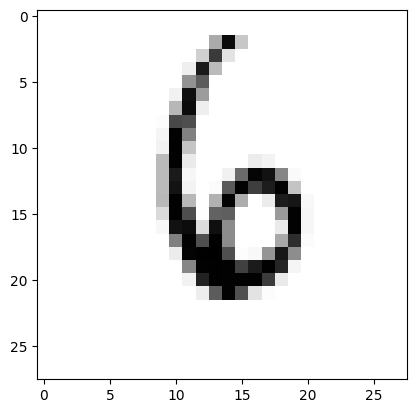

In [15]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [1]:
#pip list

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       983
           1       0.99      0.99      0.99      1133
           2       0.99      0.98      0.98      1043
           3       0.99      0.99      0.99      1007
           4       0.99      0.98      0.99       994
           5       0.98      0.99      0.99       885
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1034
           8       0.98      0.99      0.99       962
           9       0.98      0.99      0.99      1001

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

